# Import Library

In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 494.1 kB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

In [ ]:
train_dir="/content/drive/MyDrive/dataset facenet 2.1/train/"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 276 images belonging to 5 classes.


In [ ]:
test_dir="/content/drive/MyDrive/dataset facenet 2.1/test/"
generator = ImageDataGenerator()
test_ds = generator.flow_from_directory(test_dir,target_size=(224, 224),batch_size=32)
classes = list(test_ds.class_indices.keys())

Found 74 images belonging to 5 classes.


# CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [ ]:
history = model.fit(train_ds,epochs= 50, batch_size=32)

Epoch 1/50
9/9 [==============================] - 136s 13s/step - loss: 0.7715 - accuracy: 0.8370
Epoch 2/50
9/9 [==============================] - 1s 108ms/step - loss: 0.1894 - accuracy: 0.9855
Epoch 3/50
9/9 [==============================] - 1s 97ms/step - loss: 0.1399 - accuracy: 0.9855
Epoch 4/50
9/9 [==============================] - 1s 132ms/step - loss: 0.0626 - accuracy: 0.9855
Epoch 5/50
9/9 [==============================] - 1s 154ms/step - loss: 0.0765 - accuracy: 0.9855
Epoch 6/50
9/9 [==============================] - 1s 141ms/step - loss: 0.1126 - accuracy: 0.9783
Epoch 7/50
9/9 [==============================] - 1s 112ms/step - loss: 0.1333 - accuracy: 0.9783
Epoch 8/50
9/9 [==============================] - 1s 106ms/step - loss: 0.0668 - accuracy: 0.9855
Epoch 9/50
9/9 [==============================] - 1s 106ms/step - loss: 0.0730 - accuracy: 0.9855
Epoch 10/50
9/9 [==============================] - 1s 106ms/step - loss: 0.0439 - accuracy: 0.9819
Epoch 11/50
9/9 [===

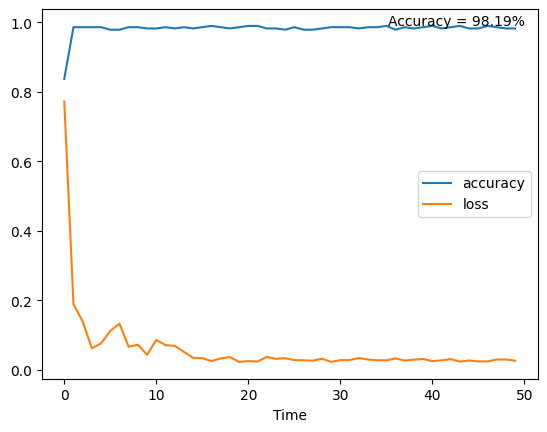

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])

final_accuracy = history.history['accuracy'][-1]

plt.text(len(history.history['accuracy']), final_accuracy, f'Accuracy = {final_accuracy*100:.2f}%', ha='right', va='bottom')

plt.show()

In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

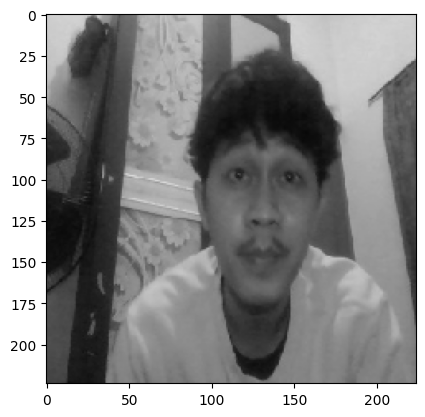

1/1 [==============================] - 0s 357ms/step
Actual: Subject17.didit.jpg
Predicted: didit


In [ ]:
predict_image("/content/drive/MyDrive/dataset facenet 2.1/test/didit/Subject17.didit.jpg")